In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from functools import reduce
sns.set()

import catboost
import xgboost as xgb
import lightgbm

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import ShuffleSplit, KFold, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, Ridge, LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

In [3]:
train = pd.read_csv('csi_analyze/dataset/train/subs_csi_train.csv',sep=';')
test = pd.read_csv('csi_analyze/dataset/test/subs_csi_test.csv',sep=';')

In [4]:
train.columns = ['user_id', 'CSI', 'CONTACT_DATE']
test.columns = ['user_id', 'CONTACT_DATE']

In [5]:
sf_test = pd.read_csv('data_ready_train/sf_test_new.csv', decimal=',')
sf_train = pd.read_csv('data_ready_train/sf_train_new.csv',decimal=',')

sbds_test = pd.read_csv('data_ready_train/sbds_test_new.csv')
sbds_train = pd.read_csv('data_ready_train/sbds_train_new.csv')

sbc_test = pd.read_csv('data_ready_train/sbc_test_new.csv')
sbc_train = pd.read_csv('data_ready_train/sbc_train_new.csv')

sbvs_test = pd.read_csv('data_ready_train/sbvs_test_new.csv')
sbvs_train = pd.read_csv('data_ready_train/sbvs_train_new.csv')

In [6]:
sbds_train = sbds_train[['count_cell_03', 'count_cell_04', 'count_cell_05', 'user_id' , 'data_vol_mb_mean_04','data_vol_mb_mean_03','data_vol_mb_mean_05', 'data_vol_mb_sum_04','data_vol_mb_sum_03','data_vol_mb_sum_05']]
sbds_test = sbds_test[['count_cell_03', 'count_cell_04', 'count_cell_05', 'user_id'   , 'data_vol_mb_mean_04','data_vol_mb_mean_03','data_vol_mb_mean_05', 'data_vol_mb_sum_04','data_vol_mb_sum_03','data_vol_mb_sum_05']]

In [7]:
# sbds_train = sbds_train.drop(['cell_id_03', 'cell_id_04', 'cell_id_05'], axis=1)
# sbds_test = sbds_test.drop(['cell_id_02', 'cell_id_03', 'cell_id_04', 'cell_id_05'], axis=1)

In [8]:
# sbc_test = pd.read_csv('data_ready_train/sbc_test.csv')
# sbc_train = pd.read_csv('data_ready_train/sbc_train.csv')

# sbds_test = pd.read_csv('data_ready_train/sbds_test.csv')
# sbds_train = pd.read_csv('data_ready_train/sbds_train.csv')

# sbvs_test = pd.read_csv('data_ready_train/sbvs_test.csv')
# sbvs_train = pd.read_csv('data_ready_train/sbvs_train.csv')


# sf_test = pd.read_csv('data_ready_train/sf_test.csv')
# sf_train = pd.read_csv('data_ready_train/sf_train.csv')

In [7]:
dfs_train = [train, sf_train, sbds_train, sbc_train, sbvs_train]
train = reduce(lambda left,right: pd.merge(left,right,on='user_id',how='outer'), dfs_train)

In [8]:
dfs_test = [test, sf_test, sbds_test, sbc_test, sbvs_test] 
test = reduce(lambda left,right: pd.merge(left,right,on='user_id',how='outer'), dfs_test)

In [9]:
target = train.CSI
train = train.drop(['CSI'], axis=1)

In [10]:
train.CONTACT_DATE = train.CONTACT_DATE.map(lambda x: int(str(x).split('.')[1]), na_action='ignore')
test.CONTACT_DATE = test.CONTACT_DATE.map(lambda x: int(str(x).split('.')[1]), na_action='ignore')

In [13]:
# train = train.replace([np.inf, -np.inf], 0)
# test = test.replace([np.inf, -np.inf], 0)

# imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
# train = imp.fit_transform(train)
# test = imp.fit_transform(test)

    or

In [14]:
# train = train.replace([np.inf, -np.inf,np.nan], 0)
# test = test.replace([np.inf, -np.inf,np.nan], 0)

### Del max corr features

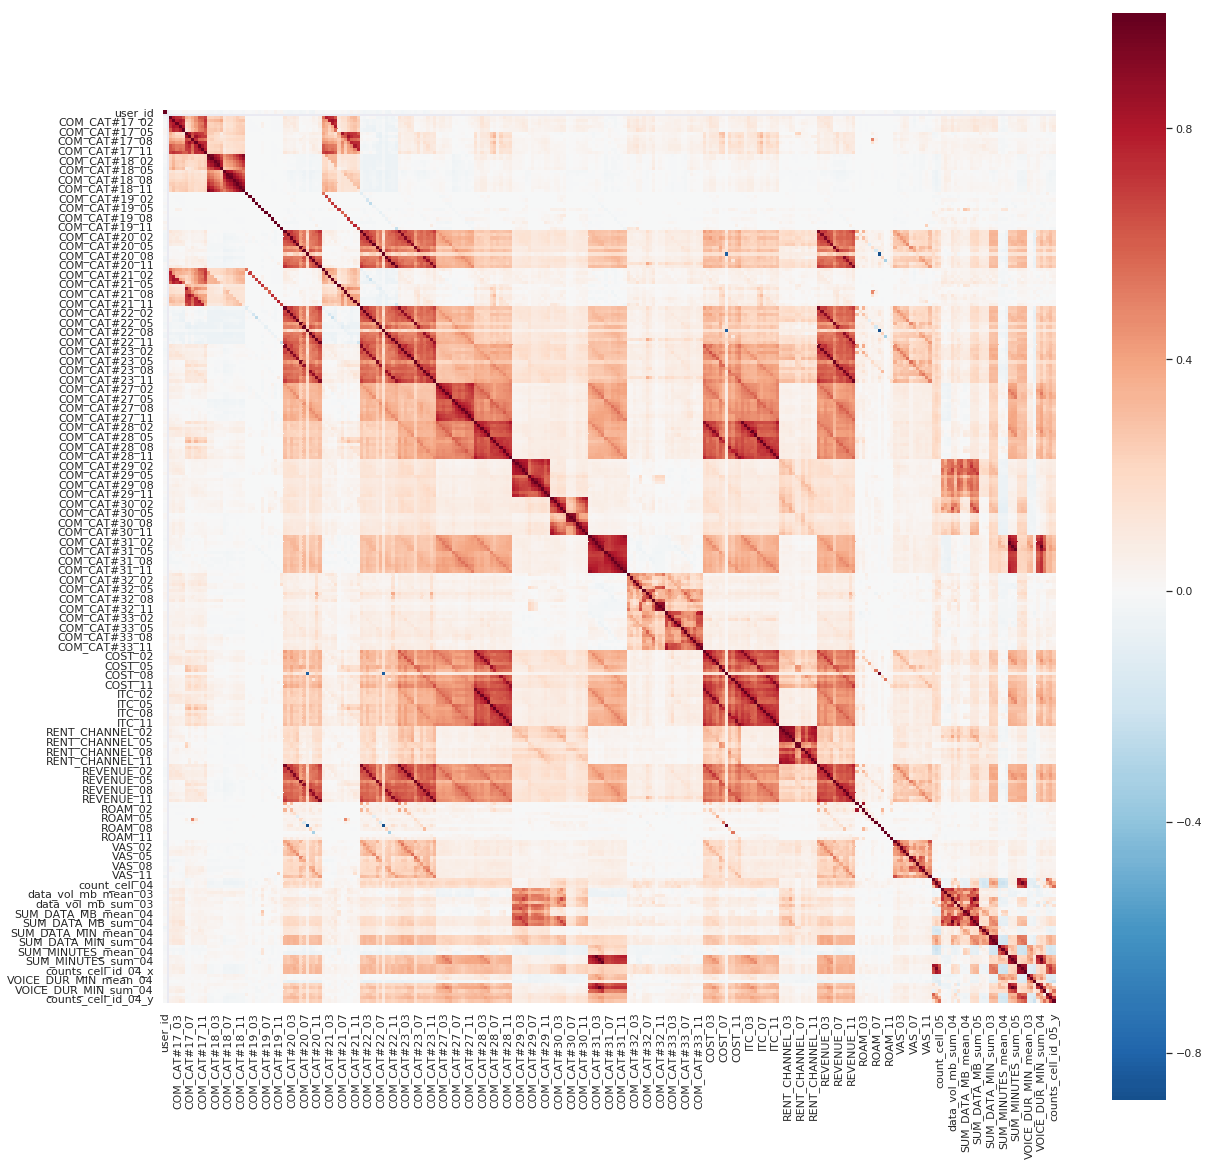

In [11]:
plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(),square=True,center=0, cmap='RdBu_r')
plt.show()

In [12]:
corr_matr = train.corr().replace([np.inf, -np.inf,np.nan], 0)

In [13]:
corr_matr

,user_id,CONTACT_DATE,COM_CAT#17_01,COM_CAT#17_02,COM_CAT#17_03,COM_CAT#17_04,COM_CAT#17_05,COM_CAT#17_06,COM_CAT#17_07,COM_CAT#17_08,...,counts_cell_id_05_x,VOICE_DUR_MIN_mean_03,VOICE_DUR_MIN_mean_04,VOICE_DUR_MIN_mean_05,VOICE_DUR_MIN_sum_03,VOICE_DUR_MIN_sum_04,VOICE_DUR_MIN_sum_05,counts_cell_id_03_y,counts_cell_id_04_y,counts_cell_id_05_y
user_id,1.000000,0.0,-2.298761e-02,-1.300523e-02,-2.608372e-03,-0.004651,0.019222,2.004763e-02,5.554537e-03,7.246650e-03,...,0.022356,6.621784e-03,-0.007074,0.010560,1.390453e-03,-0.009617,-0.005764,6.749062e-04,0.008891,-0.002304
CONTACT_DATE,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
COM_CAT#17_01,-0.022988,0.0,1.000000e+00,8.029520e-01,7.492997e-01,0.721356,0.624350,3.546759e-01,3.036401e-01,3.860256e-01,...,0.038025,3.341700e-02,0.013914,-0.003511,1.351505e-02,0.042329,0.054526,8.612138e-03,0.036696,0.050587
COM_CAT#17_02,-0.013005,0.0,8.029520e-01,1.000000e+00,7.911831e-01,0.829572,0.769028,2.678064e-01,2.629477e-01,3.524703e-01,...,0.056068,1.585473e-02,0.005922,-0.000837,1.374909e-02,0.037563,0.048646,8.714292e-03,0.046653,0.056390
COM_CAT#17_03,-0.002608,0.0,7.492997e-01,7.911831e-01,1.000000e+00,0.807577,0.724103,1.836192e-01,2.346107e-01,3.119641e-01,...,0.049473,2.081588e-02,0.010378,-0.000749,1.168994e-02,0.054283,0.077013,2.821543e-02,0.063329,0.065578
COM_CAT#17_04,-0.004651,0.0,7.213563e-01,8.295721e-01,8.075772e-01,1.000000,0.811691,1.861361e-01,2.306129e-01,3.257709e-01,...,0.076348,1.709798e-02,0.012438,0.005291,1.239361e-02,0.052178,0.082239,1.069162e-02,0.059448,0.102836
COM_CAT#17_05,0.019222,0.0,6.243503e-01,7.690275e-01,7.241034e-01,0.811691,1.000000,1.396581e-01,2.061604e-01,2.974829e-01,...,0.085113,1.288820e-02,0.010919,0.014587,1.160098e-02,0.037995,0.074535,7.415133e-03,0.047787,0.083662
COM_CAT#17_06,0.020048,0.0,3.546759e-01,2.678064e-01,1.836192e-01,0.186136,0.139658,1.000000e+00,8.373559e-01,6.636368e-01,...,-0.009756,5.082590e-03,0.007403,0.003752,1.782982e-03,-0.004551,0.001324,-1.413033e-02,-0.016668,-0.005579
COM_CAT#17_07,0.005555,0.0,3.036401e-01,2.629477e-01,2.346107e-01,0.230613,0.206160,8.373559e-01,1.000000e+00,6.386124e-01,...,-0.007596,4.150548e-03,0.009533,0.001945,6.721224e-03,0.004677,-0.001578,-1.150608e-02,-0.014026,-0.012418
COM_CAT#17_08,0.007247,0.0,3.860256e-01,3.524703e-01,3.119641e-01,0.325771,0.297483,6.636368e-01,6.386124e-01,1.000000e+00,...,0.018569,1.444388e-02,0.004648,0.014979,2.477211e-02,0.016578,0.014045,1.973176e-02,0.006978,0.008092


In [17]:
del_features = []
for index,i in enumerate(corr_matr.sum()):
    if (i < 15):
        del_features.append(corr_matr.columns[index])

#### Del features

In [18]:
train = train.drop(del_features, axis=1)
test = test.drop(del_features, axis=1)

In [19]:
del_features_e = [
'SUM_DATA_MB_mean_02',
 'SUM_DATA_MB_sum_02',
 'SUM_DATA_MIN_mean_02',
 'SUM_DATA_MIN_sum_02',
 'SUM_MINUTES_mean_02',
 'SUM_MINUTES_sum_02',
 'VOICE_DUR_MIN_mean_02',
 'VOICE_DUR_MIN_sum_02',
 'cell_id_02_x',
 'cell_id_02_y',
 'counts_cell_id_02_x',
 'counts_cell_id_02_y',
'cell_id_03_y', 'cell_id_04_y', 'cell_id_05_y',
'cell_id_03_x', 'cell_id_04_x', 'cell_id_05_x'
]


In [20]:
test = test.drop(del_features_e, axis=1)

In [21]:
del_features_r = [
    'cell_id_03_y' ,'cell_id_04_y', 'cell_id_05_y',
    'cell_id_03_x' ,'cell_id_04_x', 'cell_id_05_x' 
]

In [22]:
train = train.drop(del_features_r, axis=1)

In [23]:
set(test.columns) - set(train.columns)

set()

In [24]:
train = train.replace([np.inf, -np.inf,np.NaN], 0)
test = test.replace([np.inf, -np.inf, np.NaN], 0)

# imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

# train = imp.fit_transform(train)
# test = imp.fit_transform(test)

In [25]:
X = train
x = test

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler = MinMaxScaler()
scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_validation = scaler.fit_transform(x_validation)
# test = scaler.fit_transform(test)
train = scaler.fit_transform(train)#values
test = scaler.fit_transform(test)#values

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

In [28]:
%%time 
train = poly.fit_transform(train)

CPU times: user 11 s, sys: 2.7 s, total: 13.7 s
Wall time: 12.8 s


In [29]:
%%time
test = poly.fit_transform(test)

CPU times: user 12.1 s, sys: 3.16 s, total: 15.3 s
Wall time: 15.3 s


### Cross-validation

In [49]:
s_split = ShuffleSplit(n_splits=5, test_size=0.3)
k_fold = StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:
#basic models 
log_reg = LogisticRegression(C=0.03, n_jobs=-1)
lin_reg = LinearRegression()

#### k_fold

In [78]:
%%time
r_log_reg_cv = cross_val_score(log_reg, train, target, cv = k_fold, scoring='roc_auc', n_jobs=8)
r_lin_reg_cv = cross_val_score(lin_reg, train, target, cv = k_fold, scoring='roc_auc', n_jobs=8)

CPU times: user 657 ms, sys: 515 ms, total: 1.17 s
Wall time: 26.1 s


In [79]:
print('LogReg: ',    r_log_reg_cv.mean())
print('LinReg: ',    r_lin_reg_cv.mean())

LogReg:  0.5400277494223651
LinReg:  0.5346527105550228


#### NMSE for k_fold

In [84]:
print('LogReg: ', np.sqrt(-cross_val_score(log_reg, train, target, cv = k_fold, n_jobs=8, scoring='neg_mean_squared_error')).mean())
print('LinReg: ', np.sqrt(-cross_val_score(lin_reg, train, target, cv = k_fold, n_jobs=8, scoring='neg_mean_squared_error')).mean())

LogReg:  0.41548897422366576
LinReg:  99783886040.1792


## Train

In [ ]:
cat = catboost.CatBoostClassifier()
cat.fit(train,target)

Learning rate set to 0.025185
0:	learn: 0.6783152	total: 11.6s	remaining: 3h 12m 56s
1:	learn: 0.6644741	total: 23.7s	remaining: 3h 16m 44s
2:	learn: 0.6513641	total: 35.8s	remaining: 3h 18m 5s
3:	learn: 0.6388093	total: 47.8s	remaining: 3h 18m 31s
4:	learn: 0.6268602	total: 59.5s	remaining: 3h 17m 19s
5:	learn: 0.6156540	total: 1m 10s	remaining: 3h 15m 12s
6:	learn: 0.6050106	total: 1m 22s	remaining: 3h 14m 25s
7:	learn: 0.5951275	total: 1m 34s	remaining: 3h 15m 18s
8:	learn: 0.5856850	total: 1m 45s	remaining: 3h 13m 19s
9:	learn: 0.5767558	total: 1m 56s	remaining: 3h 12m 50s
10:	learn: 0.5684621	total: 2m 8s	remaining: 3h 12m 9s
11:	learn: 0.5606100	total: 2m 20s	remaining: 3h 12m 10s
12:	learn: 0.5530001	total: 2m 30s	remaining: 3h 10m 45s
13:	learn: 0.5459577	total: 2m 43s	remaining: 3h 12m 7s
14:	learn: 0.5392637	total: 2m 54s	remaining: 3h 11m 23s
15:	learn: 0.5330937	total: 3m 6s	remaining: 3h 11m 31s
16:	learn: 0.5271921	total: 3m 18s	remaining: 3h 11m 41s
17:	learn: 0.5215151	

In [43]:
cat.predict_proba(test)

array([[0.87207854, 0.12792146],
       [0.88274401, 0.11725599],
       [0.90238811, 0.09761189],
       ...,
       [0.89074791, 0.10925209],
       [0.89878568, 0.10121432],
       [0.86430925, 0.13569075]])

In [44]:
cat.tree_count_

1000

### Submission

In [99]:
def make_submission(predicted):
    submission = []
    for i in predicted:
        submission.append(max(i))
        
    f = open('submission{}.txt'.format('::'.join(time.ctime().split()[2:4])), 'w')
    for i in submission:
        f.write(str(i) + '\r')

In [100]:
ans = clf.predict_proba(test)

In [101]:
make_submission(ans)